In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_NORMAL_500_v3.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,-1.037213,0.122516,2.222373,1.768441,0.535370,0.817126,0.887564,0.177032,-0.637317,0.170172,...,3.307236,3.567945,3.041047,2.650529,2.192301,NaN,NaN,NaN,0.424577,0.0
1,1.335390,1.592021,0.105620,-0.569830,-1.936606,-2.159233,0.055004,-0.304618,-0.428491,-2.114047,...,-3.127266,-2.525985,-2.156904,-1.265969,-1.088417,NaN,NaN,NaN,0.792029,0.0
2,0.576089,-0.614140,-1.955747,-0.383681,0.071087,0.605902,1.198012,1.982545,-0.035235,-1.106450,...,-2.174720,-2.015002,-1.678418,0.244067,1.764900,NaN,NaN,NaN,0.336560,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.692590
std        0.222238
min        0.247278
25%        0.485802
50%        0.780755
75%        0.903432
max        0.999553
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x70422e08f048>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, to

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.6514		-0.580039	2.2072
2		-0.6336		-0.571362	1.8021
3		-0.6232		-0.562446	2.2331
4		-0.6047		-0.552966	2.7133
5		-0.5912		-0.552966	3.3898
6		-0.5787		-0.546004	3.2674
7		-0.5703		-0.541329	3.2923
8		-0.5633		-0.541329	3.9066
9		-0.5557		-0.525712	3.8532
10		-0.5468		-0.479765	4.5203
11		-0.5376		-0.46506	4.9327
12		-0.5258		-0.449246	5.4779
13		-0.5097		-0.449023	6.187
14		-0.4946		-0.422645	5.6751
15		-0.4852		-0.422645	6.7674
16		-0.4673		-0.419353	7.5068
17		-0.4545		-0.398674	5.5582
18		-0.446		-0.395628	6.76
19		-0.4297		-0.389054	6.3339
20		-0.4207		-0.369712	7.1417
21		-0.4079		-0.349495	7.1092
22		-0.4005		-0.349495	7.3021
23		-0.3948		-0.349495	7.1026
24		-0.3858		-0.349495	8.4784
25		-0.3833		-0.347385	8.987
26		-0.3766		-0.347385	9.5279
27		-0.3706		-0.261734	13.2643
28		-0.3646		-0.261734	8.7624
29		-0.3582		-0.257632	8.9436
30		-0.3497		-0.249854	9.6443
31		-0.3255		-0.249708	8.4333
32		-0.3148		-0.235334	10.0242
33		-0.2943		-0.235334	9.1139
34		

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 17.4 s, sys: 20 ms, total: 17.4 s
Wall time: 17.4 s


In [15]:
distances[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

Testing separation for shapelet 0
Accuracy = 0.5575
[[124  76]
 [101  99]]


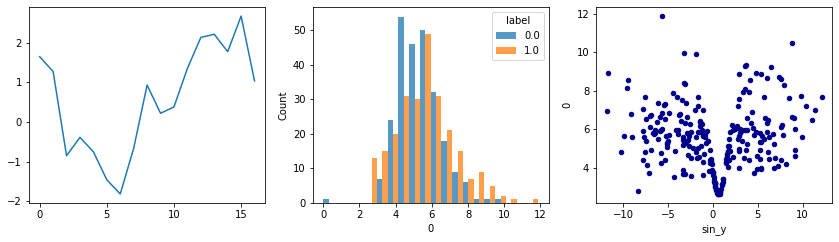

Testing separation for shapelet 1
Accuracy = 0.5325
[[ 96 104]
 [ 83 117]]


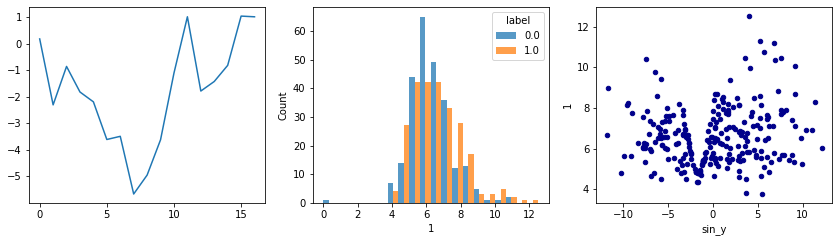

Testing separation for shapelet 2
Accuracy = 0.4675
[[100 100]
 [113  87]]


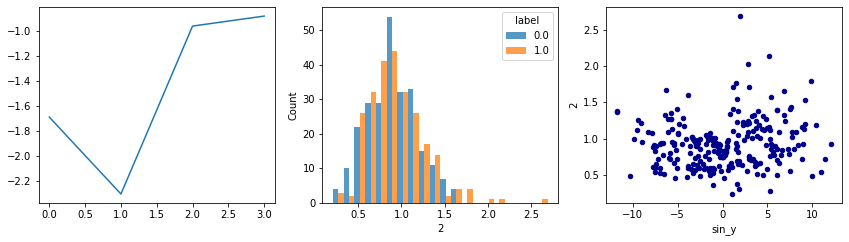

Testing separation for shapelet 3
Accuracy = 0.5475
[[119  81]
 [100 100]]


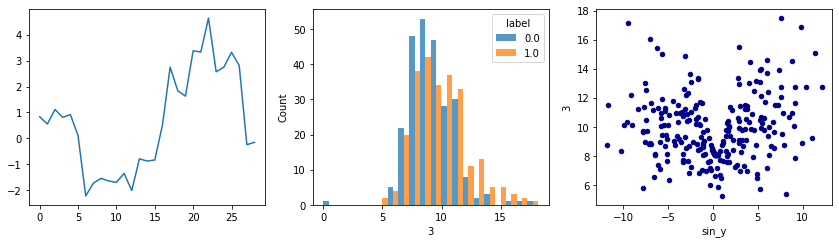

Testing separation for shapelet 4
Accuracy = 0.5775
[[ 96 104]
 [ 65 135]]


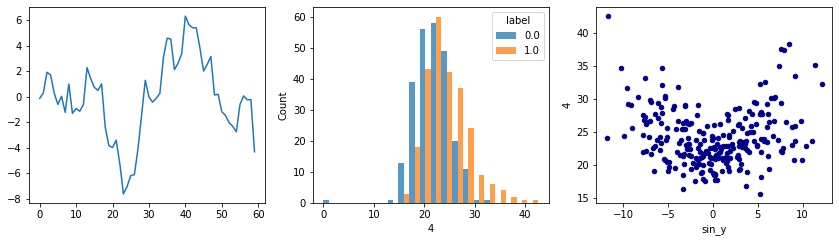

Testing separation for shapelet 5
Accuracy = 0.5525
[[109  91]
 [ 88 112]]


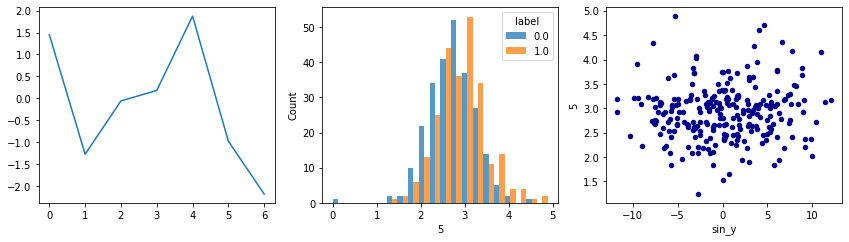

Testing separation for shapelet 6
Accuracy = 0.555
[[106  94]
 [ 84 116]]


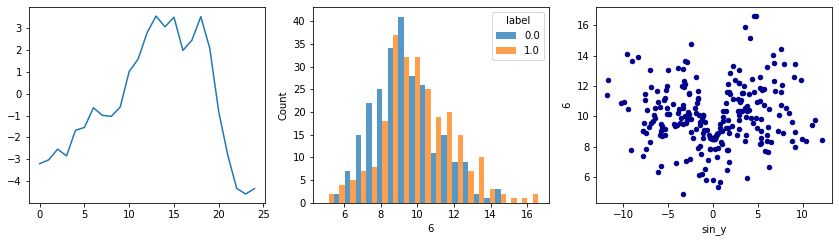

Testing separation for shapelet 7
Accuracy = 0.48
[[ 86 114]
 [ 94 106]]


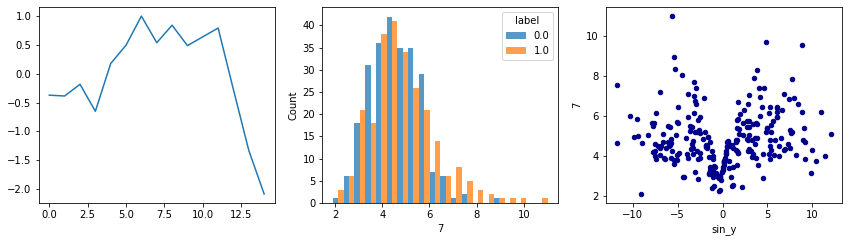

Testing separation for shapelet 8
Accuracy = 0.51
[[108  92]
 [104  96]]


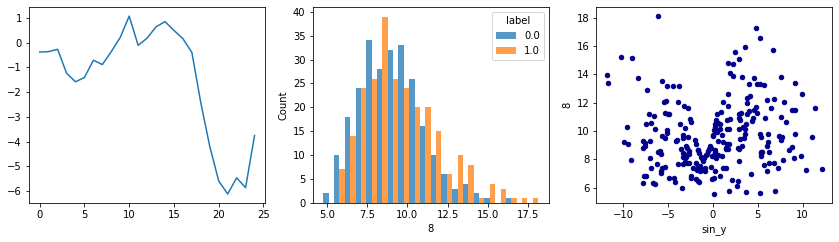

Testing separation for shapelet 9
Accuracy = 0.5475
[[122  78]
 [103  97]]


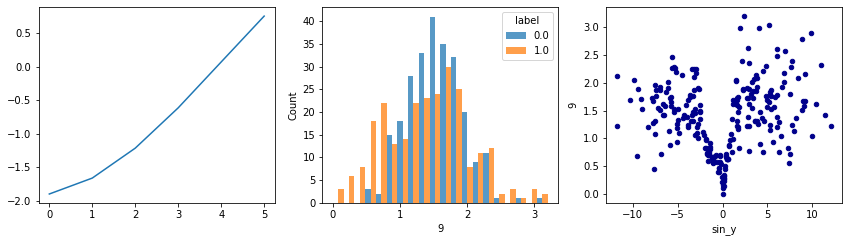

Testing separation for shapelet 10
Accuracy = 0.555
[[133  67]
 [111  89]]


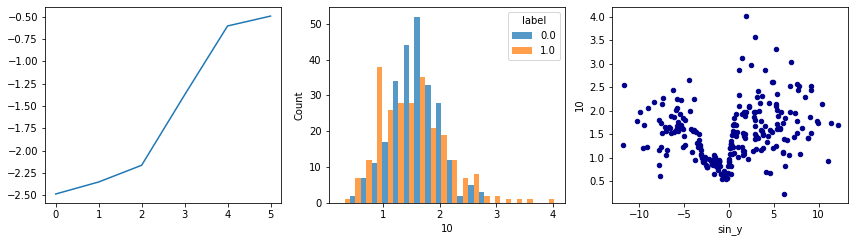

Testing separation for shapelet 11
Accuracy = 0.53
[[100 100]
 [ 88 112]]


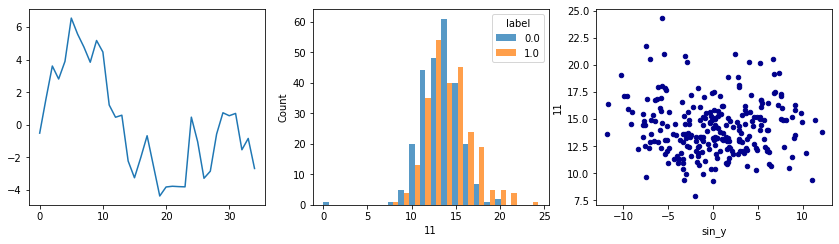

Testing separation for shapelet 12
Accuracy = 0.575
[[120  80]
 [ 90 110]]


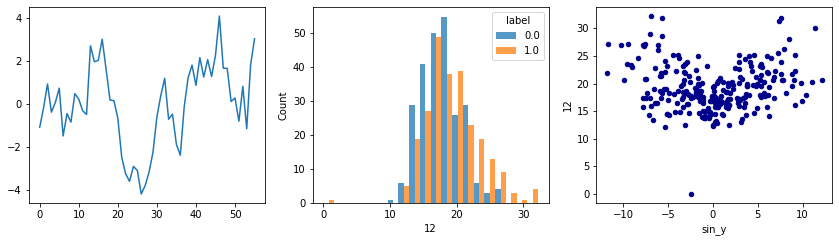

Testing separation for shapelet 13
Accuracy = 0.55
[[105  95]
 [ 85 115]]


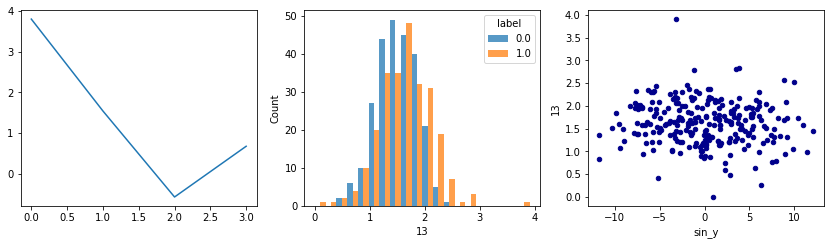

Testing separation for shapelet 14
Accuracy = 0.4775
[[106  94]
 [115  85]]


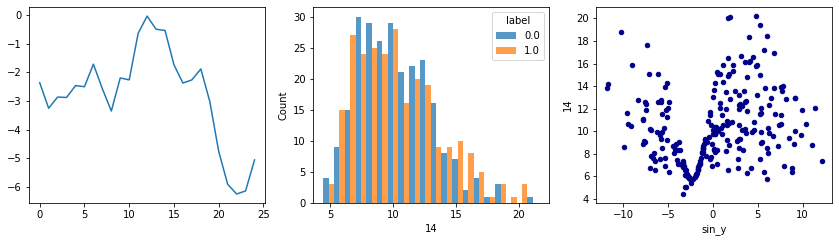

Testing separation for shapelet 15
Accuracy = 0.53
[[ 91 109]
 [ 79 121]]


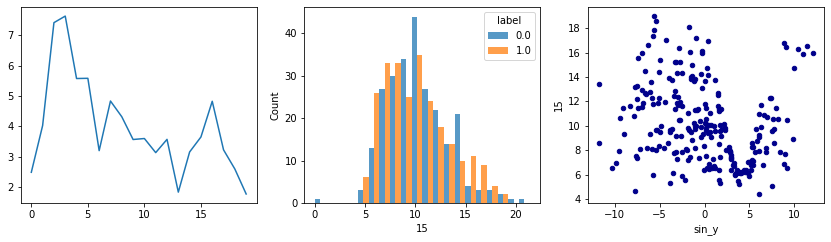

Testing separation for shapelet 16
Accuracy = 0.51
[[ 93 107]
 [ 89 111]]


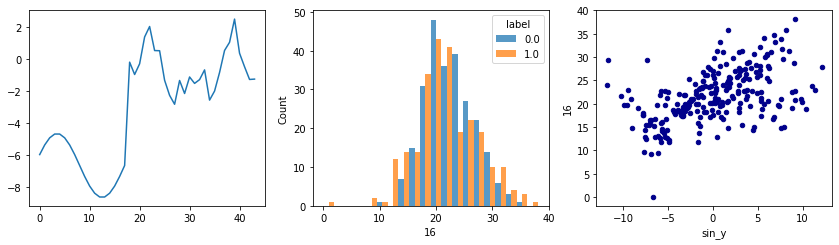

Testing separation for shapelet 17
Accuracy = 0.5725
[[117  83]
 [ 88 112]]


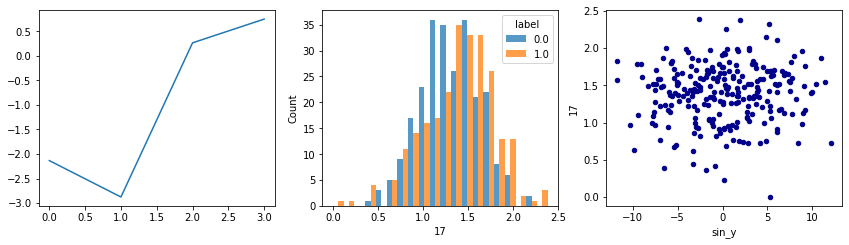

Testing separation for shapelet 18
Accuracy = 0.5375
[[ 96 104]
 [ 81 119]]


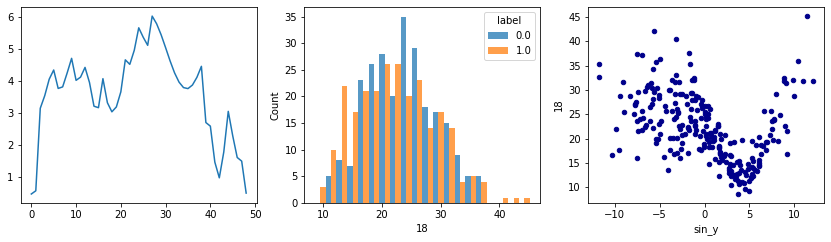

Testing separation for shapelet 19
Accuracy = 0.54
[[107  93]
 [ 91 109]]


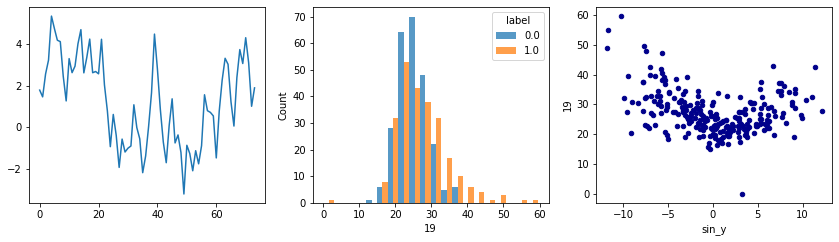

Testing separation for shapelet 20
Accuracy = 0.5575
[[118  82]
 [ 95 105]]


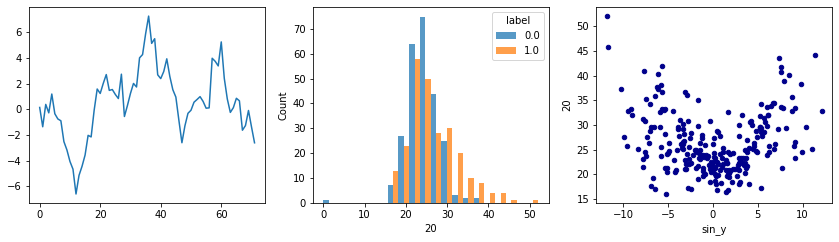

Testing separation for shapelet 21
Accuracy = 0.505
[[107  93]
 [105  95]]


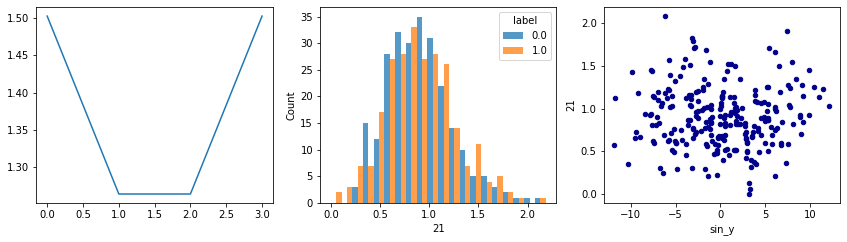

Testing separation for shapelet 22
Accuracy = 0.475
[[ 96 104]
 [106  94]]


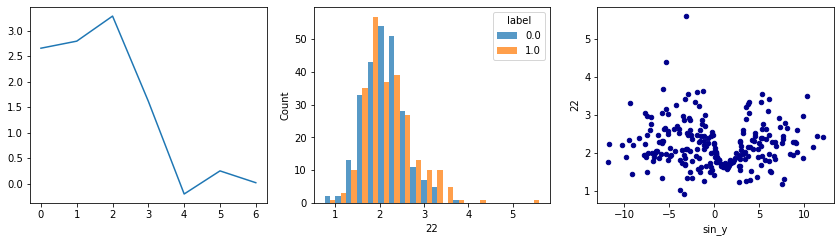

Testing separation for shapelet 23
Accuracy = 0.57
[[107  93]
 [ 79 121]]


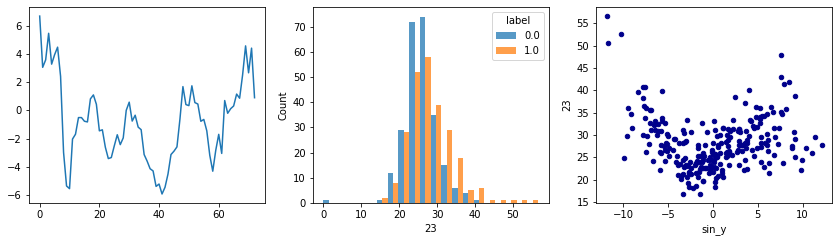

Testing separation for shapelet 24
Accuracy = 0.54
[[113  87]
 [ 97 103]]


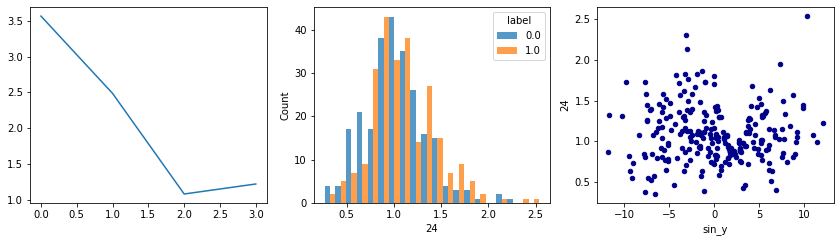

Testing separation for shapelet 25
Accuracy = 0.4575
[[107  93]
 [124  76]]


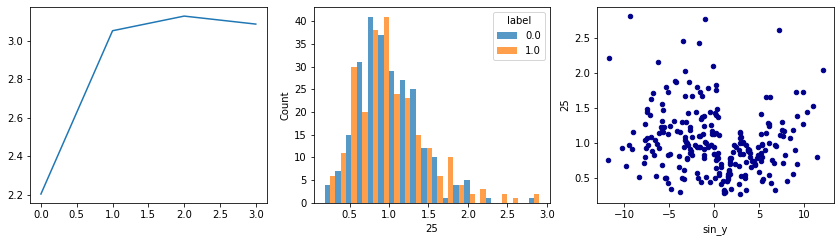

Testing separation for shapelet 26
Accuracy = 0.61
[[127  73]
 [ 83 117]]


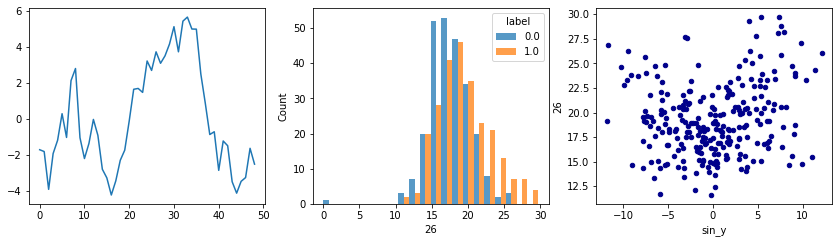

Testing separation for shapelet 27
Accuracy = 0.445
[[ 86 114]
 [108  92]]


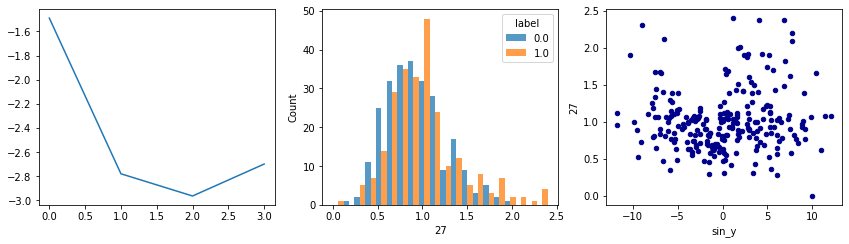

Testing separation for shapelet 28
Accuracy = 0.53
[[106  94]
 [ 94 106]]


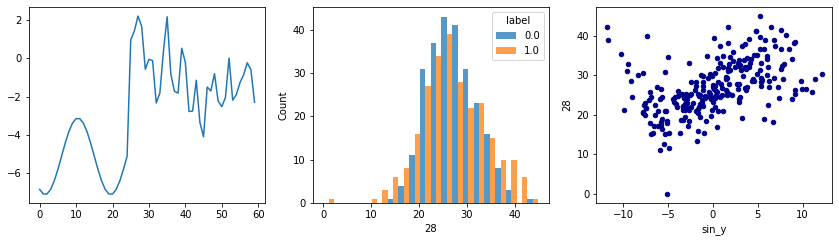

In [16]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i,
        plot_sin_y=True
    )